In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [3]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [4]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [5]:
df2008 =df.loc['2008-12-31':'2008-01-01']

In [6]:
df2008.groupby(df2008['event_type'])['fatalities'].sum()

event_type
Battles                       456
Explosions/Remote violence     71
Protests                        1
Riots                          89
Strategic developments          0
Violence against civilians    533
Name: fatalities, dtype: int64

Text(0, 0.5, ' ')

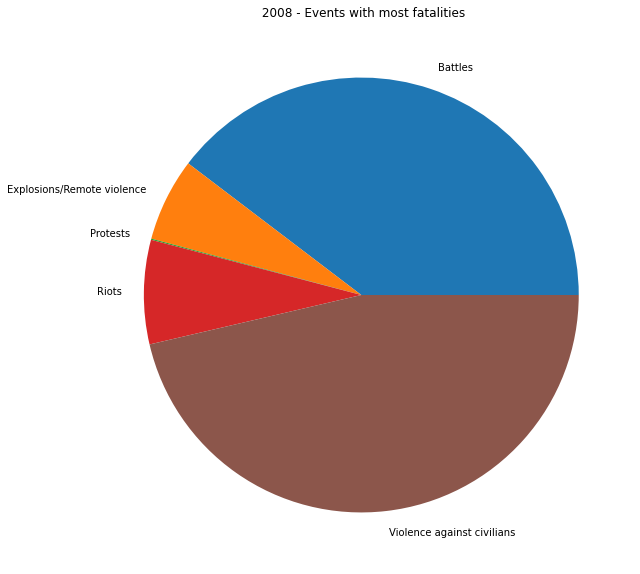

In [7]:
df2008.groupby(df2008['event_type'])['fatalities'].sum().plot(kind='pie',figsize=(14,10))
plt.title(' 2008 - Events with most fatalities')
plt.ylabel(' ')

In [8]:
df2008.groupby([df2008['event_type'], df2008['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                    
Battles                     Armed clash                           456
Explosions/Remote violence  Remote explosive/landmine/IED          71
Protests                    Excessive force against protesters      1
                            Peaceful protest                        0
                            Protest with intervention               0
Riots                       Mob violence                           33
                            Violent demonstration                  56
Strategic developments      Agreement                               0
                            Arrests                                 0
                            Change to group/activity                0
                            Looting/property destruction            0
                            Other                                   0
Violence against civilians  Abduction/forced disappearance          0
                           

Text(0, 0.5, ' ')

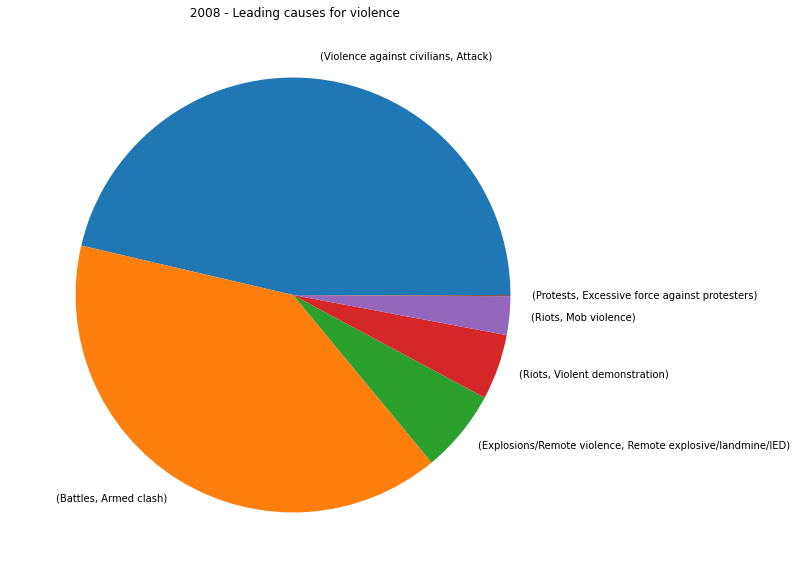

In [9]:
df2008.groupby([df2008['event_type'], df2008['sub_event_type']])['fatalities'].sum().sort_values(ascending=False).plot(kind='pie', figsize=(14,10))
plt.title(' 2008 - Leading causes for violence')
plt.ylabel(' ')

Text(0.5, 0, 'Number of fatalities')

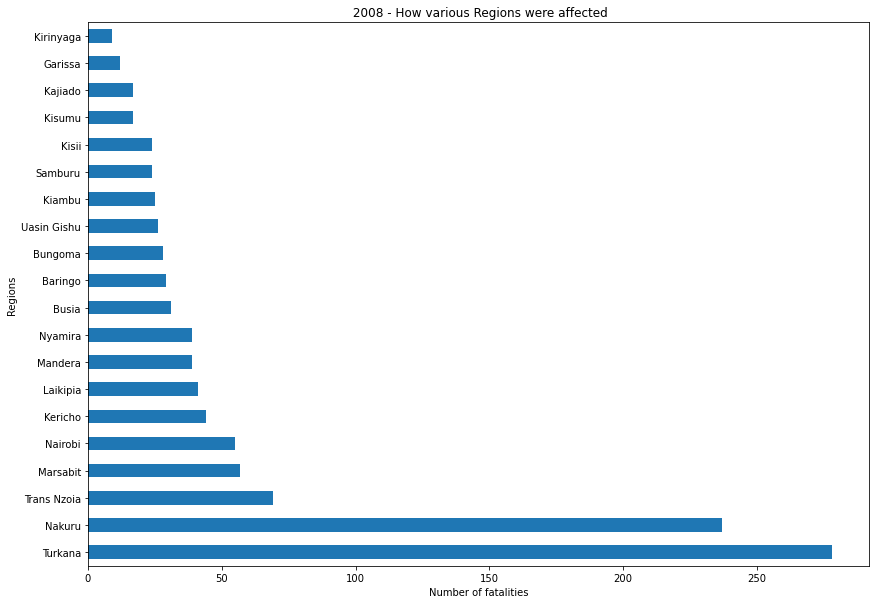

In [10]:
df2008.groupby(df2008['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10))
plt.title(' 2008 - How various Regions were affected')
plt.ylabel('Regions')
plt.xlabel('Number of fatalities')

In [11]:
regions = df2008.groupby([df2008['admin1'],df2008['sub_event_type']])['fatalities'].sum()
regions[['Turkana', 'Nakuru', 'Nairobi']]

admin1   sub_event_type                    
Turkana  Armed clash                           140
         Attack                                 67
         Remote explosive/landmine/IED          71
         Violent demonstration                   0
Nakuru   Armed clash                            89
         Attack                                109
         Excessive force against protesters      0
         Mob violence                           15
         Peaceful protest                        0
         Protest with intervention               0
         Violent demonstration                  24
Nairobi  Armed clash                            17
         Attack                                 24
         Mob violence                            0
         Peaceful protest                        0
         Protest with intervention               0
         Sexual violence                         0
         Violent demonstration                  14
Name: fatalities, dtype: int64

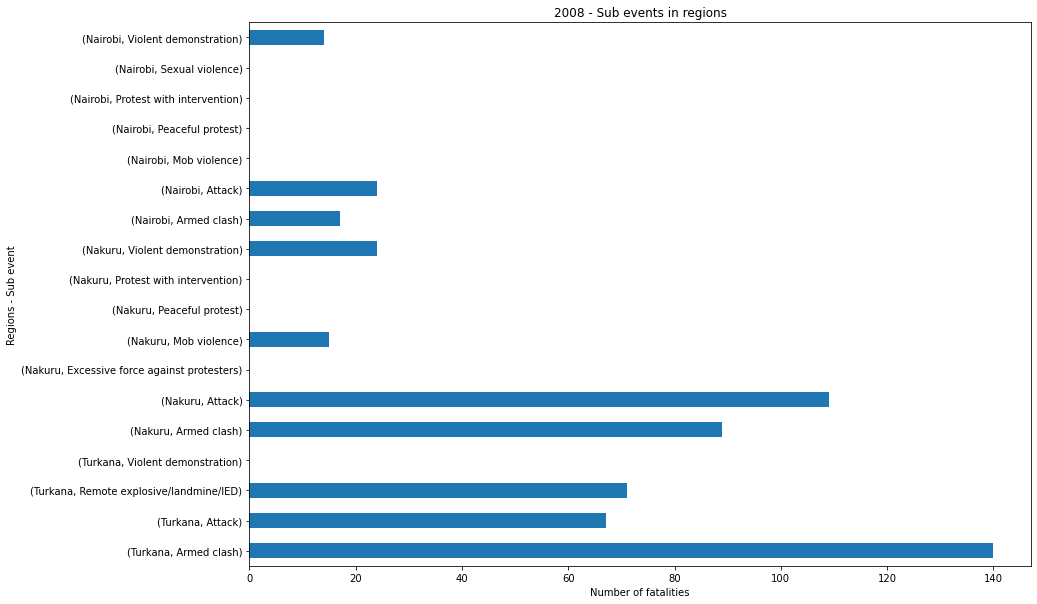

In [12]:
regions[['Turkana', 'Nakuru', 'Nairobi']].plot(kind='barh', figsize=(14,10))
plt.title('2008 - Sub events in regions')
plt.ylabel('Regions - Sub event')
plt.xlabel('Number of fatalities')
